### 1. Importing libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Graphs created are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
path = r'C:\Users\Ryan Pares\Zomato'

In [6]:
df = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'zomato.csv'))

### 2. Data cleaning

In [7]:
df.columns

Index(['address', 'name', 'rate', 'votes', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'listed_in(type)',
       'listed_in(city)', 'Price category'],
      dtype='object')

In [8]:
df.head()

,address,name,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city),Price category
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,4,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari,Expensive
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,4,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari,Expensive
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,4,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari,Expensive
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,4,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari,Moderate
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,4,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari,Expensive


In [9]:
df.shape

(43740, 12)

In [10]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

address                        0
name                           0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
listed_in(type)                0
listed_in(city)                0
Price category                 0
dtype: int64

In [11]:
# Check for duplicates
dups = df.duplicated()

In [12]:
dups.shape # No duplicates

(43740,)

### 3. Data prep for regression analysis 

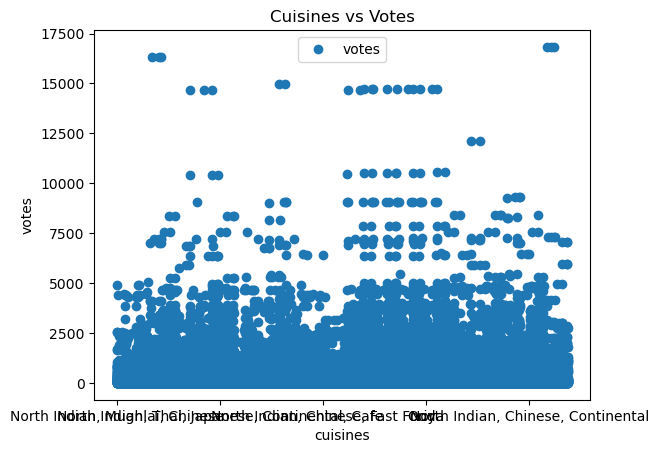

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'cuisines', y='votes',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cuisines vs Votes')  
plt.xlabel('cuisines')  
plt.ylabel('votes')  
plt.show()

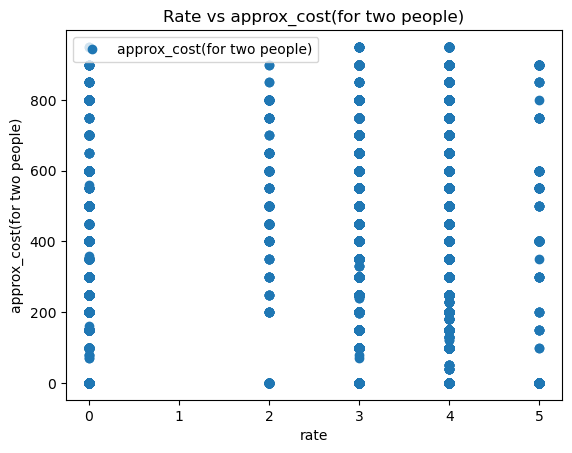

In [40]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'rate', y='approx_cost(for two people)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Rate vs approx_cost(for two people)')  
plt.xlabel('rate')  
plt.ylabel('approx_cost(for two people)')  
plt.show()

In [48]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df['rate'].values.reshape(-1,1)
y = df['approx_cost(for two people)'].values.reshape(-1,1)

In [49]:
x

array([[4],
       [4],
       [4],
       ...,
       [4],
       [4],
       [3]], dtype=int64)

In [50]:
y

array([[800],
       [800],
       [800],
       ...,
       [  0],
       [  0],
       [  0]], dtype=int64)

In [51]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [52]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [53]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(x_test)

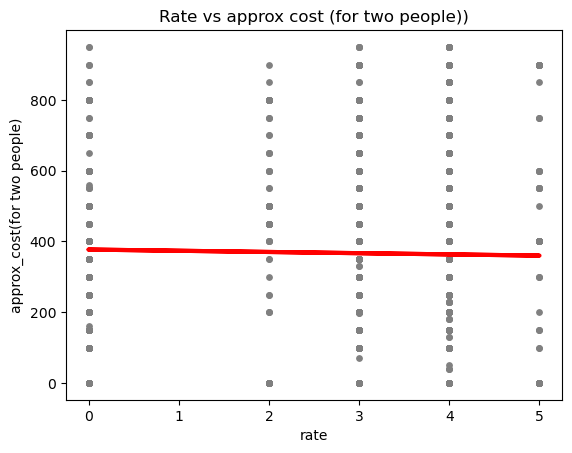

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, color='gray', s = 15)
plot_test.plot(x_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rate vs approx cost (for two people))')
plot_test.xlabel('rate')
plot_test.ylabel('approx_cost(for two people)')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.41644056]]
Mean squared error:  58328.25408682938
R2 score:  -0.0004458218612628517


In [59]:
y_predicted

array([[363.42392697],
       [366.84036754],
       [366.84036754],
       ...,
       [363.42392697],
       [363.42392697],
       [363.42392697]])

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,450,363.423927
1,400,366.840368
2,300,366.840368
3,200,363.423927
4,500,366.840368
5,450,370.256808
6,150,363.423927
7,750,366.840368
8,500,366.840368
9,600,366.840368


In [62]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting X_train!

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-3.41644056]]
Mean squared error:  58570.52561153566
R2 score:  0.0001823979207147275


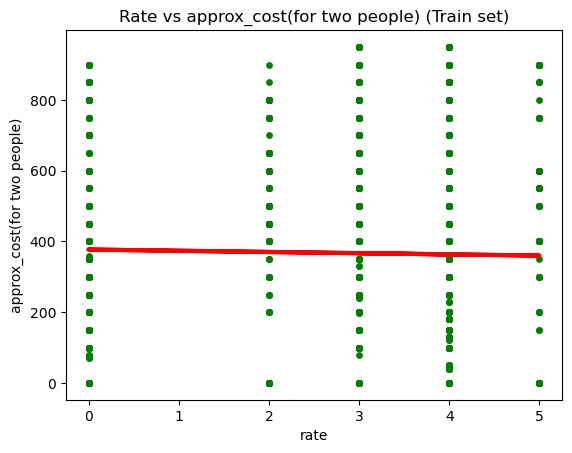

In [65]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, color='green', s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Rate vs approx_cost(for two people) (Train set)')
plot_test.xlabel('rate')
plot_test.ylabel('approx_cost(for two people)')
plot_test.show()

In [67]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['approx_cost(for two people)'] <=100] 

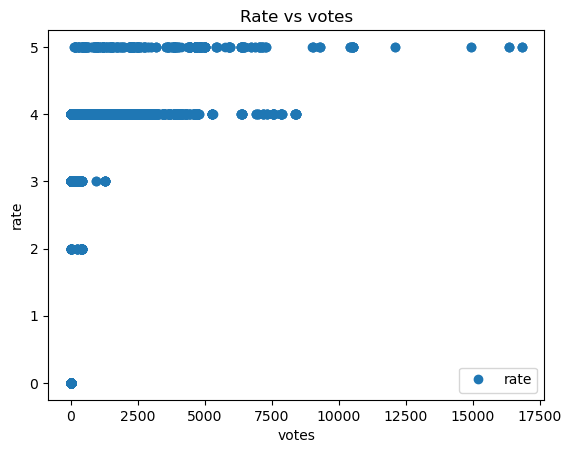

In [81]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'votes', y='rate', style='o')  
plt.title('Rate vs votes')  
plt.xlabel('votes')  
plt.ylabel('rate')  
plt.show()

In [82]:
# Reshape again.

x_2 = df_test['votes'].values.reshape(-1,1)
y_2 = df_test['rate'].values.reshape(-1,1)

In [83]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2, test_size=0.3, random_state=0)

In [84]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(x_train_2, y_train_2)

LinearRegression()

In [85]:
# Predict.

y_predicted_2 = regression.predict(x_test_2)

In [86]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [87]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00016725]]
Mean squared error:  0.44229030365881217
R2 score:  0.0942832149895857


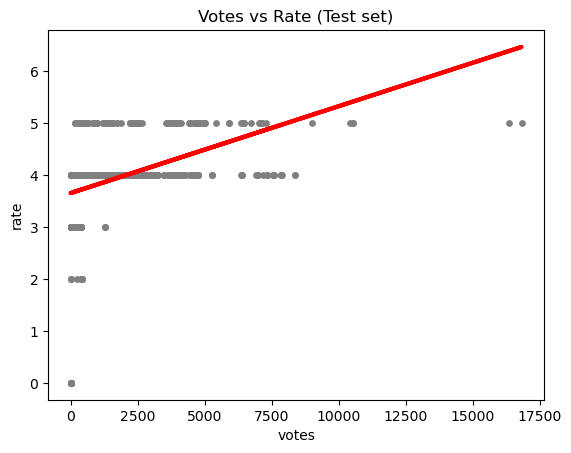

In [88]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(x_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(x_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Votes vs Rate (Test set)')
plot_test.xlabel('votes')
plot_test.ylabel('rate')
plot_test.show()

In [89]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,4,4.971832
1,4,3.664249
2,4,3.743025
3,5,4.446324
4,3,3.661908
5,4,3.756406
6,4,3.662410
7,5,4.302152
8,4,3.688501
9,4,3.872479


#### The regression analysis in your image shows the relationship between votes and rate. Here are the key points:

#### Positive Correlation: The regression line has a positive slope, indicating that as the number of votes increases, the rate also tends to increase.
#### Model Fit: The scatter plot shows how well the data points align with the regression line, suggesting a good fit.
#### Actual vs. Predicted: The output includes arrays of actual and predicted values, which help evaluate the model’s accuracy. If the predicted values are close to the actual values, it indicates that the model is performing well. Additionally, the scatter plot shows how well the data points align with the regression line, which suggests a good fit.